In [1]:
# Miguel Roca García

**TO DO:**
- Investigar recomendaciones, pautas y estrategias para un correcto preprocesamiento de un dataset
- Investigar todas los modelos de regresión y diferentes aproximaciones que se pueden realizar
- Decisión de todos los algoritmos vamos a aplicar
- Hacer árbol de decisión para registrar todas las posibles pruebas a realizar
- Investigar Power BI y Redes Neurales + Deep Learning

**Planificación Calendario**
* 27/03 - 18/04 (3 Semanas) -> Análisis y preprocesamiento
* 18/04 - 23/05 (5 Semanas) -> Modelos
* 23/05 - 13/06 (3 Semanas) -> Análisis de resultados
* 13/06 - 20/06 (1 Semana) -> Finiquitar memoria
* 20/06 ENTREGA DEL TFG
* 20/06 - 30/06 (1-2 semanas) -> Preparar presentación
* 30/06 PRESENTACIÓN TFG

**TO DO Inmediato**
- Aprender:
    - MatPlotLib: https://www.youtube.com/watch?v=wB9C0Mz9gSo&t=0s
    - Seaborn: https://www.youtube.com/watch?v=6GUZXDef2U0
- Ver vídeos de análisis y preprocesamiento de datos:
    - Best way to fill nan for machine learning
- Análisis de datos + preprocesar
- Rellenar NaN
    - Media 
    - Mediana
    - Interpolar y extrapolar
    - KNN
    - Autoencoder(Redes Neuronales)
- Normalizar, eliminar ouutliers y demás
- Si tengo muchas features puedo seleccionar las K más relevantes con sklearn.feature selection.SelectKBest(k=K) 
- Aumentar features con interactions? (Combinaciones de varias features)
- Reducción de dimensionalidad??? y añadirlas a las q  ya tengo

A **Box Cox transformation** is a transformation of a non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests

**Notas**
- Considerar añadir total population(Monaco (y Macao) es pequeñito y tiene una esperanza muy alta)
- Añadir GNI per cápita

# Importar Librerías

In [82]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

# Importar Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/UnifiedDataset.csv', sep=',')

In [4]:
df

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Death Cardiovascular,Low CI Value % Death Cardiovascular,High CI Value % Death Cardiovascular,Suicides Rate,Alcohol Abuse,Air Pollution Death Rate Stroke,Low CI Value Air Pollution Death Rate Stroke,High CI Value Air Pollution Death Rate Stroke,Air Pollution Death Rate Stroke Age Standarized,Low CI Value Air Pollution Death Rate Stroke Age Standarized,High CI Value Air Pollution Death Rate Stroke Age Standarized,Air Pollution Death Rate Ischaemic Heart Disease,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease,High CI Value Air Pollution Death Rate Ischaemic Heart Disease,Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,High CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Air Pollution Death Rate Lower Respiratory Infections,Low CI Value Air Pollution Death Rate Lower Respiratory Infections,High CI Value Air Pollution Death Rate Lower Respiratory Infections,Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Low CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,High CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Air Pollution Death Rate Total,Low CI Value Air Pollution Death Rate Total,High CI Value Air Pollution Death Rate Total,Air Pollution Death Rate Total Age Standarized,Low CI Value Air Pollution Death Rate Total Age Standarized,High CI Value Air Pollution Death Rate Total Age Standarized,Air Pollution Death Rate Trachea Bronchus Lung Cancers,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Unsafe Wash Mortality Rate,Poisoning Mortality Rate,Tobacco Prevalence,% Population Aged 0-14,% Population Aged 15-64,% Population Aged 65+,% Population Aged 65-69,% Population Aged 70-74,% Population Aged 75-79,% Population Aged 80+,Maternal Mortality Ratio,Low CI Value Maternal Mortality Ratio,High CI Value Maternal Mortality Ratio,% of Births Attended By Skilled Personal,Neonatal Mortality Rate,Low CI Value Neonatal Mortality Rate,High CI Value Neonatal Mortality Rate,Incidence of Malaria,Incidence of Tuberculosis,Low CI Value Incidence of Tuberculosis,High CI Value Incidence of Tuberculosis,Hepatirus B Surface Antigen,Low CI Value Hepatirus B Surface Antigen,High CI Value Hepatirus B Surface Antigen,Intervention Against NTDs,Road Traffic Deaths,Reproductive Age Women,Adolescent Birth Rate,Universal Heath Care Coverage,Population 10 Percentage SDG Total,Population 10 Percentage SDG Urban,Population 10 Percentage SDG Rural,Population 25 Percentage SDG Total,Population 25 Percentage SDG Urban,Population 25 Percentage SDG Rural,Doctors,Nurses and Midwifes,Dentists,Pharmacists,Basic Drinking Water Services,Basic Sanization Services Total,Basic Sanization Services Urban,Basic Sanization Services Rural,Safely Sanitation Total,Safely Sanitation Urban,Safely Sanitation Rural,Basic Hand Washing Total,Basic Hand Washing

# Análisis de datos y preprocesamiento

### Análisis general

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Columns: 110 entries, Country to Income per Capita
dtypes: float64(107), int64(1), object(2)
memory usage: 18.5+ MB


In [6]:
df.describe()

,Year,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Death Cardiovascular,Low CI Value % Death Cardiovascular,High CI Value % Death Cardiovascular,Suicides Rate,Alcohol Abuse,Air Pollution Death Rate Stroke,Low CI Value Air Pollution Death Rate Stroke,High CI Value Air Pollution Death Rate Stroke,Air Pollution Death Rate Stroke Age Standarized,Low CI Value Air Pollution Death Rate Stroke Age Standarized,High CI Value Air Pollution Death Rate Stroke Age Standarized,Air Pollution Death Rate Ischaemic Heart Disease,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease,High CI Value Air Pollution Death Rate Ischaemic Heart Disease,Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,High CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Air Pollution Death Rate Lower Respiratory Infections,Low CI Value Air Pollution Death Rate Lower Respiratory Infections,High CI Value Air Pollution Death Rate Lower Respiratory Infections,Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Low CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,High CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Air Pollution Death Rate Total,Low CI Value Air Pollution Death Rate Total,High CI Value Air Pollution Death Rate Total,Air Pollution Death Rate Total Age Standarized,Low CI Value Air Pollution Death Rate Total Age Standarized,High CI Value Air Pollution Death Rate Total Age Standarized,Air Pollution Death Rate Trachea Bronchus Lung Cancers,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Unsafe Wash Mortality Rate,Poisoning Mortality Rate,Tobacco Prevalence,% Population Aged 0-14,% Population Aged 15-64,% Population Aged 65+,% Population Aged 65-69,% Population Aged 70-74,% Population Aged 75-79,% Population Aged 80+,Maternal Mortality Ratio,Low CI Value Maternal Mortality Ratio,High CI Value Maternal Mortality Ratio,% of Births Attended By Skilled Personal,Neonatal Mortality Rate,Low CI Value Neonatal Mortality Rate,High CI Value Neonatal Mortality Rate,Incidence of Malaria,Incidence of Tuberculosis,Low CI Value Incidence of Tuberculosis,High CI Value Incidence of Tuberculosis,Hepatirus B Surface Antigen,Low CI Value Hepatirus B Surface Antigen,High CI Value Hepatirus B Surface Antigen,Intervention Against NTDs,Road Traffic Deaths,Reproductive Age Women,Adolescent Birth Rate,Universal Heath Care Coverage,Population 10 Percentage SDG Total,Population 10 Percentage SDG Urban,Population 10 Percentage SDG Rural,Population 25 Percentage SDG Total,Population 25 Percentage SDG Urban,Population 25 Percentage SDG Rural,Doctors,Nurses and Midwifes,Dentists,Pharmacists,Basic Drinking Water Services,Basic Sanization Services Total,Basic Sanization Services Urban,Basic Sanization Services Rural,Safely Sanitation Total,Safely Sanitation Urban,Safely Sanitation Rural,Basic Hand Washing Total,Basic Hand Washing Urban,Basic Ha

In [7]:
#Me gustaría ver el número de NaNs que hay por fila
nans = []
for i in range(df.shape[0]):
    nans.append(df.loc[i].isna().sum().sum())
n_nans = np.array(nans)

Text(0, 0.5, 'Número de filas')

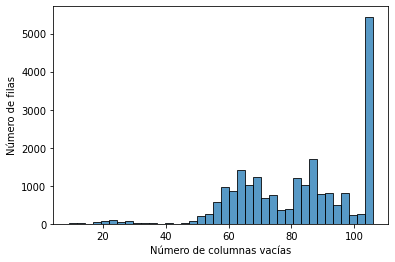

In [8]:
#Número de filas con N columnas vacías
sns.histplot(n_nans)
plt.xlabel('Número de columnas vacías')
plt.ylabel('Número de filas')

### Life Expectancy

In [9]:
#Cuando sepa matplotlib y seaborn haré algunas gráficas de análisis de datos

In [47]:
df[['Life Expectancy']].describe()

,Life Expectancy
count,16718.000000
mean,68.477565
std,10.017089
min,24.834000
25%,61.931250
50%,70.801500
75%,76.025000
max,87.669000


c:\users\migue\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life Expectancy', ylabel='Density'>

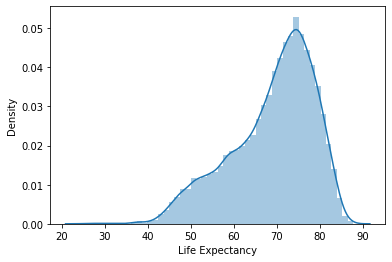

In [11]:
sns.distplot(df['Life Expectancy'])

Text(0.5, 1.0, 'Esperanza de Vida')

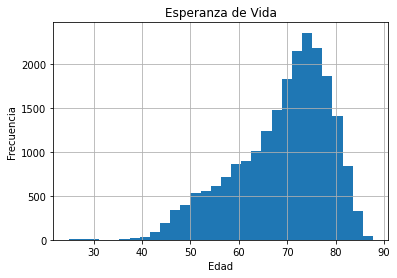

In [12]:
#Histograma
df['Life Expectancy'].hist(bins=30)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Esperanza de Vida')

c:\users\migue\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\migue\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\migue\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

Text(0, 0.5, 'Density')

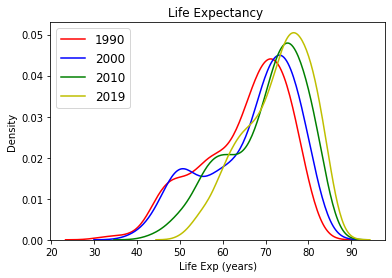

In [64]:
#Gráfica de la media por año
sns.distplot(df['Life Expectancy'][df['Year'] == 1990], hist=False, label='1990', color='r')
sns.distplot(df['Life Expectancy'][df['Year'] == 2000], hist=False, label='2000', color='b')
sns.distplot(df['Life Expectancy'][df['Year'] == 2010], hist=False, label='2010', color='g')
sns.distplot(df['Life Expectancy'][df['Year'] == 2019], hist=False, label='2019', color='y')
plt.legend(prop={'size': 12})
plt.title('Life Expectancy ')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density')

In [14]:
#Ver incremento o cambio por país

In [15]:
#Ver diferencia por género

In [16]:
# Analizar valores max y  min
df[df['Life Expectancy'] < 40][['Country','Year', 'Gender', 'Life Expectancy']]

,Country,Year,Gender,Life Expectancy
16410,Rwanda,1990,Both sexes,33.413
16411,Rwanda,1990,Female,34.941
16412,Rwanda,1990,Male,31.941
16413,Rwanda,1991,Both sexes,29.248
16414,Rwanda,1991,Female,30.761
16415,Rwanda,1991,Male,27.800
16416,Rwanda,1992,Both sexes,26.691
16417,Rwanda,1992,Female,28.161
16418,Rwanda,1992,Male,25.288
16419,Rwanda,1993,Both sexes,26.172


In [17]:
#Gráficas de Ruanda y Sierra Leona

In [18]:
df[df['Life Expectancy'] > 86][['Country','Year', 'Gender', 'Life Expectancy']]

,Country,Year,Gender,Life Expectancy
8584,Hong Kong,2011,Female,86.131
8587,Hong Kong,2012,Female,86.333
8590,Hong Kong,2013,Female,86.545
8593,Hong Kong,2014,Female,86.764
8596,Hong Kong,2015,Female,86.986
8599,Hong Kong,2016,Female,87.202
8602,Hong Kong,2017,Female,87.403
8605,Hong Kong,2018,Female,87.586
8608,Hong Kong,2019,Female,87.747
9595,Japan,2008,Female,86.019


In [ ]:
#Se puede estandarizar la variable objetivo?

In [70]:
#Outlier Detection
#Turkey IQR
#Values below Q1-1.5*(Q3-Q1) or above Q3+1.5*(Q3-Q1)
def find_outliers_Turkey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    floor = q1 - 1.5 * (q3-q1)
    ceiling = q3 + 1.5 * (q3-q1)
    outlier_values = x[(x < floor)|(x>ceiling)]
    return outlier_values

<AxesSubplot:>

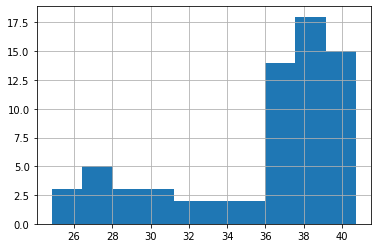

In [76]:
find_outliers_Turkey(df['Life Expectancy']).hist()

Text(0.5, 1.0, 'Basic Plot')

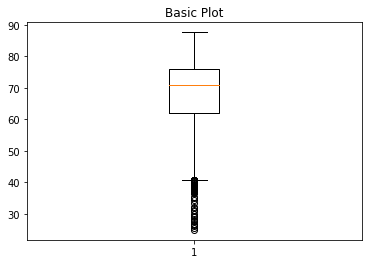

In [95]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df['Life Expectancy'])
ax1.set_title('Basic Plot')

### Country

In [46]:
df[['Country']].describe()

,Country
count,16718
unique,201
top,Saint Lucia
freq,90


In [20]:
#Número total de páises diferentes
len(df['Country'].unique())

281

In [21]:
#Hay elementos en Country que no son países, puesto que existen 193 países reconocidos por la ONU
df['Country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia, Central',
       'Australia', 'Australia & New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Caribbean', 'Cayman Islands',
       'Central African Republic', 'Central America',
       'Central and Southern Asia', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo'

In [22]:
#Eiminamos aquellas filas de las que solo conocíamos Life Expectancy
df = pd.merge(df[['Country','Year','Gender','Life Expectancy']], df.drop(['Country','Year','Gender','Life Expectancy'], axis=1).dropna(how='all'),left_index=True, right_index=True).reset_index(drop=True)

In [23]:
len(df['Country'].unique())

201

In [24]:
df.shape

(16718, 110)

Podemos realizar diferentes clasificaciones de países:
- Por zona geográfica
- Desarrollados, subdesarrollados y en vias de desarrollo
- Nutrición: https://knoema.es/infographics/gcaicze/difference-of-daily-diet-across-countries
- https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf
- etc.

In [96]:
#Eliminar aquellas filas que no correspondan a países(Hacer lista de países)
# Hacer clasificaciones de países (si procede porque al final puede ser una feature más realmente a partir de un csv)

In [26]:
#df.drop('Country',axis=1,inplace=True)

### Year

In [45]:
df[['Year']].describe()

,Year
count,16718.000000
mean,2004.518663
std,8.648935
min,1990.000000
25%,1997.000000
50%,2005.000000
75%,2012.000000
max,2019.000000


<AxesSubplot:>

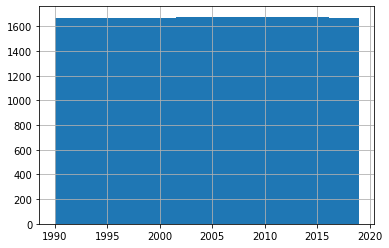

In [28]:
df['Year'].hist()

<AxesSubplot:xlabel='Year', ylabel='Life Expectancy'>

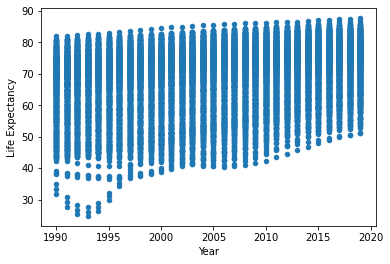

In [77]:
df.plot(kind='scatter', y='Life Expectancy', x ='Year')

In [ ]:
#Escalar

### Gender

In [29]:
#Hay países de los que no tenemos male y female, solo both sexes. Hay países que tengo male y female pero no both sexes

In [30]:
#Obtener países que solo tienen both gender

#Obtener países que solo tienen male and female
df_count_gender = df.groupby(['Country', 'Year']).size().reset_index().rename(columns={0:'Count'})
df_count_gender[df_count_gender['Count'] == 2]['Country'].unique()

array(['Sub-Saharan Africa'], dtype=object)

In [31]:
df_count_gender[df_count_gender['Count'] == 1]['Country'].unique() #Países de los que solo se tiene both sexes

array(['American Samoa', 'Andorra', 'Bermuda', 'British Virgin Islands',
       'Cayman Islands', 'Cook Islands', 'Dominica', 'Greenland',
       'Isle of Man', 'Liechtenstein', 'Marshall Islands', 'Monaco',
       'Nauru', 'Niue', 'Northern Mariana Islands', 'Palau',
       'Saint Kitts and Nevis', 'San Marino', 'Sint Maarten (Dutch part)',
       'Turks and Caicos Islands', 'Tuvalu'], dtype=object)

In [32]:
df[df['Country'] == 'Sub-Saharan Africa']#Habrá que eliminarlo porque no es un país

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Death Cardiovascular,Low CI Value % Death Cardiovascular,High CI Value % Death Cardiovascular,Suicides Rate,Alcohol Abuse,Air Pollution Death Rate Stroke,Low CI Value Air Pollution Death Rate Stroke,High CI Value Air Pollution Death Rate Stroke,Air Pollution Death Rate Stroke Age Standarized,Low CI Value Air Pollution Death Rate Stroke Age Standarized,High CI Value Air Pollution Death Rate Stroke Age Standarized,Air Pollution Death Rate Ischaemic Heart Disease,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease,High CI Value Air Pollution Death Rate Ischaemic Heart Disease,Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,High CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Air Pollution Death Rate Lower Respiratory Infections,Low CI Value Air Pollution Death Rate Lower Respiratory Infections,High CI Value Air Pollution Death Rate Lower Respiratory Infections,Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Low CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,High CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Air Pollution Death Rate Total,Low CI Value Air Pollution Death Rate Total,High CI Value Air Pollution Death Rate Total,Air Pollution Death Rate Total Age Standarized,Low CI Value Air Pollution Death Rate Total Age Standarized,High CI Value Air Pollution Death Rate Total Age Standarized,Air Pollution Death Rate Trachea Bronchus Lung Cancers,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Unsafe Wash Mortality Rate,Poisoning Mortality Rate,Tobacco Prevalence,% Population Aged 0-14,% Population Aged 15-64,% Population Aged 65+,% Population Aged 65-69,% Population Aged 70-74,% Population Aged 75-79,% Population Aged 80+,Maternal Mortality Ratio,Low CI Value Maternal Mortality Ratio,High CI Value Maternal Mortality Ratio,% of Births Attended By Skilled Personal,Neonatal Mortality Rate,Low CI Value Neonatal Mortality Rate,High CI Value Neonatal Mortality Rate,Incidence of Malaria,Incidence of Tuberculosis,Low CI Value Incidence of Tuberculosis,High CI Value Incidence of Tuberculosis,Hepatirus B Surface Antigen,Low CI Value Hepatirus B Surface Antigen,High CI Value Hepatirus B Surface Antigen,Intervention Against NTDs,Road Traffic Deaths,Reproductive Age Women,Adolescent Birth Rate,Universal Heath Care Coverage,Population 10 Percentage SDG Total,Population 10 Percentage SDG Urban,Population 10 Percentage SDG Rural,Population 25 Percentage SDG Total,Population 25 Percentage SDG Urban,Population 25 Percentage SDG Rural,Doctors,Nurses and Midwifes,Dentists,Pharmacists,Basic Drinking Water Services,Basic Sanization Services Total,Basic Sanization Services Urban,Basic Sanization Services Rural,Safely Sanitation Total,Safely Sanitation Urban,Safely Sanitation Rural,Basic Hand Washing Total,Basic Hand Washing

In [ ]:
#Hacer get_dummies

### Infant Mortality Rate

In [44]:
#The infant mortality rate is the number of infant deaths for every 1,000 live births
df[['Infant Mortality Rate', 'Low CI Value Infant Mortality Rate', 'High CI Value Infant Mortality Rate']].describe()

,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate
count,13557.000000,13557.000000,13557.000000
mean,33.707938,30.151508,38.014945
std,32.607622,29.733126,36.548675
min,1.420000,0.780000,1.780000
25%,8.000000,7.440000,8.630000
50%,21.020000,18.330000,24.110000
75%,51.220000,44.650000,57.990000
max,189.200000,173.300000,207.600000


In [40]:
#Número de valores NaN
df['Infant Mortality Rate'].isna().sum()

3161

c:\users\migue\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\migue\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\migue\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0.5, 1.0, 'Infant Mortality Rate ')

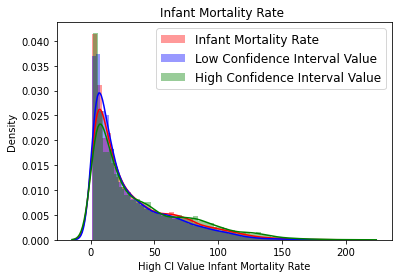

In [52]:
sns.distplot(df['Infant Mortality Rate'], label='Infant Mortality Rate', color='r')
sns.distplot(df['Low CI Value Infant Mortality Rate'], label='Low Confidence Interval Value', color='b')
sns.distplot(df['High CI Value Infant Mortality Rate'], label='High Confidence Interval Value', color='g')
plt.legend(prop={'size': 12})
plt.title('Infant Mortality Rate ')
# plt.xlabel('Life Exp (years)')
# plt.ylabel('Density')

<AxesSubplot:xlabel='Infant Mortality Rate', ylabel='Life Expectancy'>

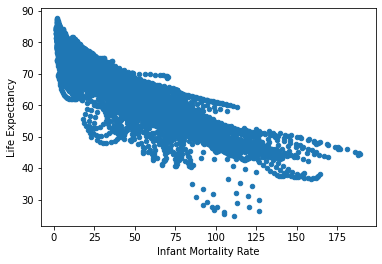

In [55]:
df.plot(kind='scatter', y='Life Expectancy', x ='Infant Mortality Rate')

In [ ]:
#Escalar

### Under 5 Mortality Rate

In [56]:
# The probability of a child born in a specific year or period dying before reaching the age of five, if subject to age-specific mortality rates of that period.
df[['Under 5 Mortality Rate', 'Low CI Value Under 5 Mortality Rate', 'High CI Value Under 5 Mortality Rate']].describe()

,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate
count,13557.000000,13557.000000,13557.000000
mean,48.727731,43.050349,55.773322
std,54.191858,48.925978,61.394996
min,1.680000,0.850000,2.220000
25%,9.420000,8.800000,10.090000
50%,24.790000,21.600000,28.580000
75%,72.090000,61.250000,83.940000
max,331.100000,309.400000,354.400000


In [57]:
#Número de valores NaN
df['Under 5 Mortality Rate'].isna().sum()

3161

c:\users\migue\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\migue\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\migue\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0.5, 1.0, 'Under 5 Mortality Rate ')

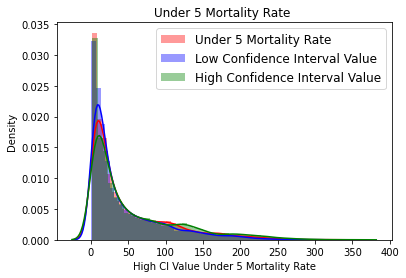

In [58]:
sns.distplot(df['Under 5 Mortality Rate'], label='Under 5 Mortality Rate', color='r')
sns.distplot(df['Low CI Value Under 5 Mortality Rate'], label='Low Confidence Interval Value', color='b')
sns.distplot(df['High CI Value Under 5 Mortality Rate'], label='High Confidence Interval Value', color='g')
plt.legend(prop={'size': 12})
plt.title('Under 5 Mortality Rate ')

<AxesSubplot:xlabel='Under 5 Mortality Rate', ylabel='Life Expectancy'>

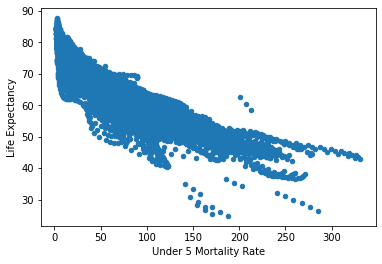

In [59]:
df.plot(kind='scatter', y='Life Expectancy', x ='Under 5 Mortality Rate')

In [60]:
#Escalar

<AxesSubplot:xlabel='Under 5 Mortality Rate', ylabel='Infant Mortality Rate'>

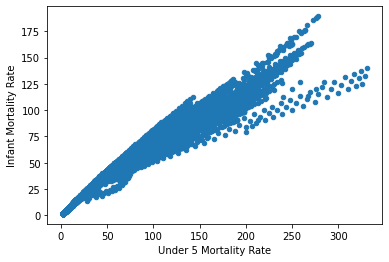

In [61]:
df.plot(kind='scatter', y='Infant Mortality Rate', x ='Under 5 Mortality Rate')

### 

In [37]:
df

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Death Cardiovascular,Low CI Value % Death Cardiovascular,High CI Value % Death Cardiovascular,Suicides Rate,Alcohol Abuse,Air Pollution Death Rate Stroke,Low CI Value Air Pollution Death Rate Stroke,High CI Value Air Pollution Death Rate Stroke,Air Pollution Death Rate Stroke Age Standarized,Low CI Value Air Pollution Death Rate Stroke Age Standarized,High CI Value Air Pollution Death Rate Stroke Age Standarized,Air Pollution Death Rate Ischaemic Heart Disease,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease,High CI Value Air Pollution Death Rate Ischaemic Heart Disease,Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,High CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Air Pollution Death Rate Lower Respiratory Infections,Low CI Value Air Pollution Death Rate Lower Respiratory Infections,High CI Value Air Pollution Death Rate Lower Respiratory Infections,Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Low CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,High CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Air Pollution Death Rate Total,Low CI Value Air Pollution Death Rate Total,High CI Value Air Pollution Death Rate Total,Air Pollution Death Rate Total Age Standarized,Low CI Value Air Pollution Death Rate Total Age Standarized,High CI Value Air Pollution Death Rate Total Age Standarized,Air Pollution Death Rate Trachea Bronchus Lung Cancers,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Unsafe Wash Mortality Rate,Poisoning Mortality Rate,Tobacco Prevalence,% Population Aged 0-14,% Population Aged 15-64,% Population Aged 65+,% Population Aged 65-69,% Population Aged 70-74,% Population Aged 75-79,% Population Aged 80+,Maternal Mortality Ratio,Low CI Value Maternal Mortality Ratio,High CI Value Maternal Mortality Ratio,% of Births Attended By Skilled Personal,Neonatal Mortality Rate,Low CI Value Neonatal Mortality Rate,High CI Value Neonatal Mortality Rate,Incidence of Malaria,Incidence of Tuberculosis,Low CI Value Incidence of Tuberculosis,High CI Value Incidence of Tuberculosis,Hepatirus B Surface Antigen,Low CI Value Hepatirus B Surface Antigen,High CI Value Hepatirus B Surface Antigen,Intervention Against NTDs,Road Traffic Deaths,Reproductive Age Women,Adolescent Birth Rate,Universal Heath Care Coverage,Population 10 Percentage SDG Total,Population 10 Percentage SDG Urban,Population 10 Percentage SDG Rural,Population 25 Percentage SDG Total,Population 25 Percentage SDG Urban,Population 25 Percentage SDG Rural,Doctors,Nurses and Midwifes,Dentists,Pharmacists,Basic Drinking Water Services,Basic Sanization Services Total,Basic Sanization Services Urban,Basic Sanization Services Rural,Safely Sanitation Total,Safely Sanitation Urban,Safely Sanitation Rural,Basic Hand Washing Total,Basic Hand Washing

In [196]:
#Habrá que eliminar aquellas filas que tengan demasiados NaNs